# - Chapter 5
# Data Preparation

Throughout this chapter, we will therefore discover a variety of topics, Python classes, and functions that will allow you to:


- Properly scale numeric features and have an easier time not just comparing and interpreting coefficients but also when dealing with unusual or missing values or with very sparse matrices (very common in textual data processing)


- Turn qualitative features into numeric values that can be accepted by a regression model and correctly transformed into predictions


- Transform numeric features in the smartest possible way to convert non-linear relationships in your data into linear ones


- Determine what to do when important data is missing to estimate a replacement or even just let the regression manage the best solution by itself


- Repair any unusual or strange value in your data and make your regression model always work properly

## Numeric feature scaling

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
#To set float output to 5 decimals and to suppress printing of \small floating point values using scientific notation
np.set_printoptions(precision=5, suppress=True)

In [2]:
boston = load_boston()
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target
observations = len(dataset)
variables = dataset.columns
X = dataset.iloc[:,:-1]
y = dataset['target'].values

In [3]:
yq = np.array(y>25, dtype=int)

After this operation, our qualitative response variable is named yq.

### Mean centering

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
linear_regression = linear_model.LinearRegression(normalize = False, fit_intercept = True)
linear_regression.fit(X, y)
print("coefficients: %s\nintercept: %0.3f" % (linear_regression.coef_, linear_regression.intercept_))

coefficients: [ -0.10801   0.04642   0.02056   2.68673 -17.76661   3.80987   0.00069
  -1.47557   0.30605  -0.01233  -0.95275   0.00931  -0.52476]
intercept: 36.459


In [6]:
dataset.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
target       5.00000
dtype: float64

In [14]:
centering = StandardScaler(with_mean = True, with_std = False)
linear_regression.fit(centering.fit_transform(X),y)
print("coefficients: %s\nintercept: %s" % (linear_regression.coef_, linear_regression.intercept_))

coefficients: [ -0.10801   0.04642   0.02056   2.68673 -17.76661   3.80987   0.00069
  -1.47557   0.30605  -0.01233  -0.95275   0.00931  -0.52476]
intercept: 22.532806324110688


In [15]:
print('mean: %0.3f' % np.mean(y))

mean: 22.533


### Standardization

In [16]:
standardization = StandardScaler(with_mean = True, with_std = True)
linear_regression.fit(standardization.fit_transform(X),y)
print("coefficients: %s\nintercept: %s" % (linear_regression.coef_, linear_regression.intercept_))

coefficients: [-0.92815  1.08157  0.1409   0.68174 -2.05672  2.67423  0.01947 -3.10404
  2.66222 -2.07678 -2.06061  0.84927 -3.74363]
intercept: 22.532806324110684


### Normalization

In [17]:
scaling = MinMaxScaler(feature_range = (0,1))
linear_regression.fit(scaling.fit_transform(X), y)
print("coefficients: %s\nintercept: %s" % (linear_regression.coef_, linear_regression.intercept_))

coefficients: [ -9.60976   4.64205   0.56084   2.68673  -8.63457  19.88369   0.06722
 -16.22666   7.03914  -6.46333  -8.95582   3.69283 -19.01724]
intercept: 26.6202675846878


### The logistic regression case

In [19]:
import statsmodels.api as sm

In [24]:
Xq = sm.add_constant(standardization.fit_transform(X))
logit = sm.Logit(yq, Xq)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.206631
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  506
Model:                          Logit   Df Residuals:                      492
Method:                           MLE   Df Model:                           13
Date:                Tue, 28 Jan 2020   Pseudo R-squ.:                  0.6289
Time:                        13:05:32   Log-Likelihood:                -104.56
converged:                       True   LL-Null:                       -281.76
Covariance Type:            nonrobust   LLR p-value:                 9.145e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0542      0.356     -8.571      0.000      -3.753      -2.356
x1            -0.0954      0.

In [25]:
print('odd ratios of coefficients: %s' % np.exp(result.params))

odd ratios of coefficients: [ 0.04716  0.90902  1.28964  0.46908  1.27788  0.45278  3.76007  1.10314
  0.28965 15.90341  0.16158  0.46603  0.81345  0.07275]


In [27]:
def sigmoid(p):
    return 1/(1+np.exp(-p))
print('intercept: %0.3f' % result.params[0])
print('probability of value above 25 when all predictors are average: %0.3f' % sigmoid(result.params[0]))

intercept: -3.054
probability of value above 25 when all predictors are average: 0.045


In [28]:
print('average likelihood of positive response: %0.3f' % (sum(yq)/float(len(yq))))

average likelihood of positive response: 0.245


In [30]:
C = np.ones(len(X))
logit = sm.Logit(yq, C)
result = logit.fit()
print(result.summary())
print('\nprobability of value above 25 using just a constant: %0.3f' % sigmoid(result.params[0]))

Optimization terminated successfully.
         Current function value: 0.556842
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  506
Model:                          Logit   Df Residuals:                      505
Method:                           MLE   Df Model:                            0
Date:                Tue, 28 Jan 2020   Pseudo R-squ.:               3.276e-11
Time:                        13:10:16   Log-Likelihood:                -281.76
converged:                       True   LL-Null:                       -281.76
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1251      0.103    -10.886      0.000      -1.328      -0.923

probability of value above 2

## Qualitative feature encoding

In [50]:
outlook   = ['sunny', 'overcast', 'rainy']
temperature = ['hot', 'mild', 'cool']
humidity    = ['high', 'normal']
windy       = ['TRUE', 'FALSE']

weather_dataset = list()

for o in outlook:
    for t in temperature:
        for h in humidity:
            for w in windy:
                weather_dataset.append([o, t, h, w])
play = [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]

### Dummy coding with Pandas

In [51]:
import pandas as pd

In [52]:
df = pd.DataFrame(weather_dataset, columns=['outlook','temperature','humidity','windy'])
print(pd.get_dummies(df.humidity).iloc[:5,:])

   high  normal
0     1       0
1     1       0
2     0       1
3     0       1
4     1       0


In [53]:
dummy_encoding = pd.get_dummies(df)

In [54]:
import statsmodels.api as sm
X = sm.add_constant(dummy_encoding)
logit = sm.Logit(play, X)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.292346
         Iterations 17
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            6
Date:                Tue, 28 Jan 2020   Pseudo R-squ.:                  0.5744
Time:                        13:41:36   Log-Likelihood:                -10.524
converged:                       True   LL-Null:                       -24.731
Covariance Type:            nonrobust   LLR p-value:                 7.856e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2393        nan        nan        nan         nan         nan
outlook_ov

In [56]:
try:
    X.drop(['outlook_sunny', 'temperature_mild', 'humidity_normal', 'windy_FALSE'], inplace=True, axis=1)
except:
    pass
logit = sm.Logit(play, X)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.292346
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   36
Model:                          Logit   Df Residuals:                       29
Method:                           MLE   Df Model:                            6
Date:                Tue, 28 Jan 2020   Pseudo R-squ.:                  0.5744
Time:                        13:42:18   Log-Likelihood:                -10.524
converged:                       True   LL-Null:                       -24.731
Covariance Type:            nonrobust   LLR p-value:                 7.856e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.4055      2.196      2.462      0.014       1.102       9.709
outlook_ove

### DictVectorizer and one-hot encoding

In [62]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = False)
dict_representation = [{varname:var for var, varname in zip(row, ['outlook', 'temperature', 'humidity', 'windy'])}
                       for row in weather_dataset]
print(dict_representation[0])
print(vectorizer.fit_transform(dict_representation))

{'outlook': 'sunny', 'temperature': 'hot', 'humidity': 'high', 'windy': 'TRUE'}
[[1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 1. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 1. 

In [63]:
print(vectorizer.feature_names_)

['humidity=high', 'humidity=normal', 'outlook=overcast', 'outlook=rainy', 'outlook=sunny', 'temperature=cool', 'temperature=hot', 'temperature=mild', 'windy=FALSE', 'windy=TRUE']


In [64]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
label_encoder = LabelEncoder()
print(label_encoder.fit_transform(df.outlook))

[2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [66]:
label_encoder.inverse_transform([0, 1, 2])

array(['overcast', 'rainy', 'sunny'], dtype=object)

### Feature hasher

In [72]:
your_text = 'Nomina sunt consequentia rerum'
mapping_words_in_text = {word: position for position, word in enumerate(set(your_text.lower()))}
print(mapping_words_in_text)

{'n': 0, ' ': 1, 'u': 2, 's': 3, 'c': 4, 'q': 5, 'e': 6, 'o': 7, 'm': 8, 'a': 9, 't': 10, 'r': 11, 'i': 12}


In [73]:
corpus = ['The quick fox jumped over the lazy dog', 'I sought a dog wondering around with a bird', 'My dog is named Fido']

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
textual_one_hot_encoder = CountVectorizer(binary=True)
textual_one_hot_encoder.fit(corpus)
vectorized_text = textual_one_hot_encoder.transform(corpus)
print(vectorized_text.todense())

[[0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0]]


In [86]:
print (textual_one_hot_encoder.get_feature_names())

['around', 'bird', 'dog', 'fido', 'fox', 'is', 'jumped', 'lazy', 'my', 'named', 'over', 'quick', 'sought', 'the', 'with', 'wondering']


In [102]:
print (textual_one_hot_encoder.transform(['John went home today']).todense())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [107]:
from sklearn.feature_extraction.text import HashingVectorizer
hashing_trick = HashingVectorizer(n_features=11, binary=True, norm=None)
M = hashing_trick.transform(corpus)
print(M.todense())

[[1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.]]


In [109]:
print(hashing_trick.transform(['John is the owner of that dog']).todense())

[[1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]]


## Numeric feature transformation

In [110]:
import numpy as np
boston = load_boston()
labels = boston.feature_names
X = boston.data
y = boston.target
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [111]:
linear_regression = linear_model.LinearRegression(fit_intercept = True)
linear_regression.fit(X, y)

from sklearn.metrics import r2_score
print("R-squared: %0.3f" % r2_score(y, linear_regression.predict(X)))

R-squared: 0.741


### Observing residuals

In [162]:
residuals = y - linear_regression.predict(X)
print ("Head of residual %s" % residuals[:5])
print ("Mean of residuals: %0.3f" % np.mean(residuals))
print ("Standard deviation of residuals: %0.3f" % np.std(residuals))

Head of residual [-121.74225 -149.75336 -142.75126 -180.14453 -176.53545]
Mean of residuals: -104.969
Standard deviation of residuals: 73.115


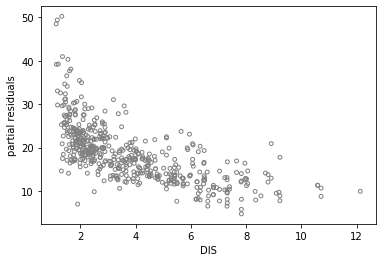

In [163]:
var = 7
partial_residual = residuals + X[:,var] * linear_regression.coef_[var]
plt.scatter(X[:,var],partial_residual, marker='o',c='',edgecolors='gray',s = 15)
plt.xlabel(boston.feature_names[var])
plt.ylabel('partial residuals')
plt.show()

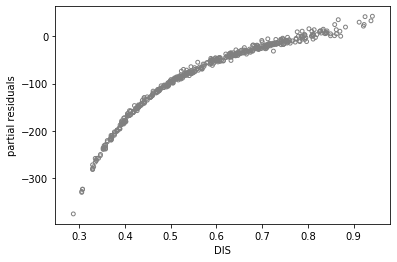

R-squared: 0.769


In [167]:
X_t = X.copy()
X_t[:,var] = 1./np.sqrt(X_t[:,var])
linear_regression.fit(X_t, y)
partial_residual = residuals + X_t[:,var] * linear_regression.coef_[var]
plt.scatter(X_t[:,var], partial_residual, marker='o',c='',edgecolors='gray',s = 15)
plt.xlabel(boston.feature_names[var])
plt.ylabel('partial residuals')
plt.show()
print ("R-squared: %0.3f" % r2_score(y, linear_regression.predict(X_t)))

In [169]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
LB = LabelBinarizer()
X_t = X.copy()
edges = np.histogram(X_t[:,var], bins=20)[1]
binning = np.digitize(X_t[:,var], edges)
X_t = np.column_stack((np.delete(X_t, var, axis=1),LB.fit_transform(binning)))
linear_regression.fit(X_t, y)
print ("R-squared: %0.3f" % r2_score(y, linear_regression.predict(X_t)))

R-squared: 0.768
